In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('/Users/manharankaur/Downloads/bank+marketing/bank/bank-full.csv', sep=';')  
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# `Normal Distribution`

The **Normal Distribution**, also known as the **Gaussian Distribution**, is one of the most widely used probability distributions in statistics. It is often used to represent real-valued random variables whose distributions are **symmetric about the mean**. In simple terms, it describes how data points are distributed in a way that the majority of the values are **clustered around the central value (mean)**, with fewer values appearing as you move further away from the center.

#### Properties of the Normal Distribution

- 1. Symmetrical
- 2. Bell-shaped Curve
- 3. Mean, Median, and Mode are located at the **`center`** of the distribution.

### Mathematical Representation

The probability density function (PDF) of a Normal distribution is given by the formula:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Where:
- \( μ \) = **Mean** of the distribution
- \( σ \) = **Standard deviation** of the distribution
- \( e \) = **Euler's number** (approximately 2.71828)
- \( x \) = **Random variable**

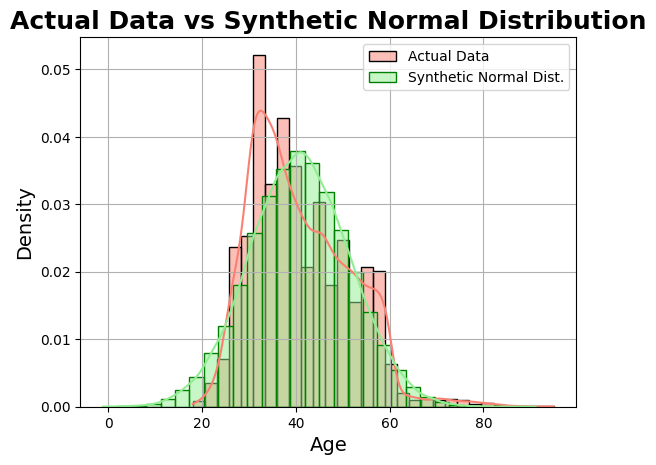

Shapiro-Wilk Test: Statistics=0.9605956926172086, p-value=5.1980127903842076e-73


/Users/manharankaur/Desktop/Coding/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 45211.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
# Calculate the mean and standard deviation of the 'age' column
mean_age = df['age'].mean()
std_age = df['age'].std()

# Generate a synthetic normal distribution using numpy.random.normal()
synthetic_normal_data = np.random.normal(loc=mean_age, scale=std_age, size=len(df))

# Plot Actual Data vs Synthetic Normal Distribution
sns.histplot(df['age'], kde=True, color='salmon', label='Actual Data', stat='density', bins=30)
sns.histplot(synthetic_normal_data, kde=True, color='lightgreen', edgecolor='green', label='Synthetic Normal Dist.', stat='density', bins=30)

# Add Titles and Labels
plt.title('Actual Data vs Synthetic Normal Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

plt.grid(True)
plt.show()

# Test for normality of the actual data using Shapiro-Wilk test
stat, p_value = stats.shapiro(df['age'])
print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')

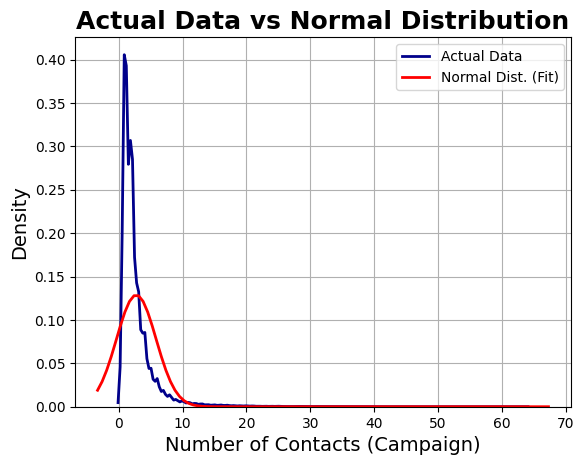

In [24]:
# Plot Actual Data's KDE
sns.kdeplot(df['campaign'], color='darkblue', label='Actual Data', linewidth=2)

# Fit Normal Distribution to the data
mu, std = stats.norm.fit(df['campaign'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
normal_pdf = stats.norm.pdf(x, mu, std)

# Plot Normal Distribution
plt.plot(x, normal_pdf, 'r-', label='Normal Dist. (Fit)', linewidth=2)

# Add Titles and Labels
plt.title('Actual Data vs Normal Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Number of Contacts (Campaign)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

plt.grid(True)
plt.show()


# `Binomial Distribution`

The **Binomial Distribution** is a discrete probability distribution used to model the number of successes in a fixed number of **independent Bernoulli trials**. A Bernoulli trial is a random experiment that has exactly two possible outcomes: **success** or **failure**. The distribution is useful when we are interested in counting the number of successes in a fixed number of trials.

In simple terms, the Binomial distribution tells us how many successes we expect after performing an experiment a set number of times.

#### Properties of the Binomial Distribution

- 1. Fixed number of trials
- 2. Two possible outcomes: success or failure.
- 3. Constant probability of success
- 4. Independent trials

### Mathematical Representation

The **probability mass function (PMF)** of a Binomial distribution is given by the formula:

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$

Where:
- \( n \) = **Number of trials**
- \( k \) = **Number of successes**
- \( p \) = **Probability of success on a single trial**
- \( 1-p \) = **Probability of failure on a single trial**
- 
$$
\binom{n}{k} = \frac{n!}{k!(n - k)!}
$$

### Mean and Variance

For a Binomial distribution:
- The **mean (μ)** is given by 
$$
 μ = n \times p 
 $$
- The **variance (σ²)** is given by 
$$
σ^2 = n \times p \times (1 - p) 
$$

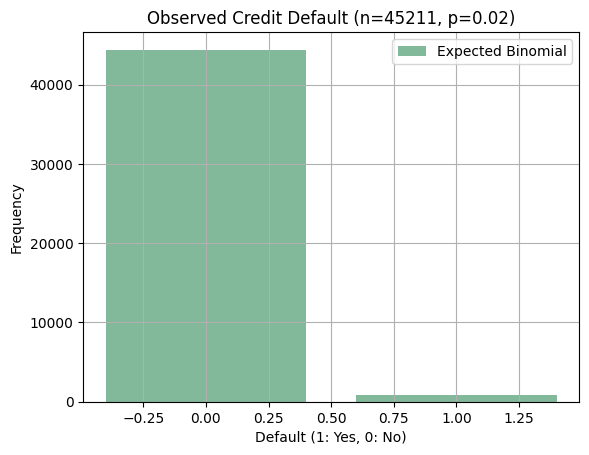

In [7]:
df['default_clean'] = df['default'].str.strip().str.lower()
data = df['default_clean'].map({'yes': 1, 'no': 0})
data = data.dropna()

n = len(data)        # Total number of samples
k = data.sum()       # Total 'yes' (defaults)
p = k / n            # Probability of default

plt.title(f"Observed Credit Default (n={n}, p={p:.2f})")
plt.xlabel('Default (1: Yes, 0: No)')
plt.ylabel('Frequency')
plt.grid(True)

# Generate expected binomial distribution
x = np.array([0, 1])                           # 0 and 1 outcomes
binom_pmf = stats.binom.pmf(x, 1, p)           # For 1 trial per client
expected_counts = binom_pmf * n                # Scale to number of clients

plt.bar(x, expected_counts, color='seagreen', alpha=0.6, label='Expected Binomial')
plt.legend()
plt.show()


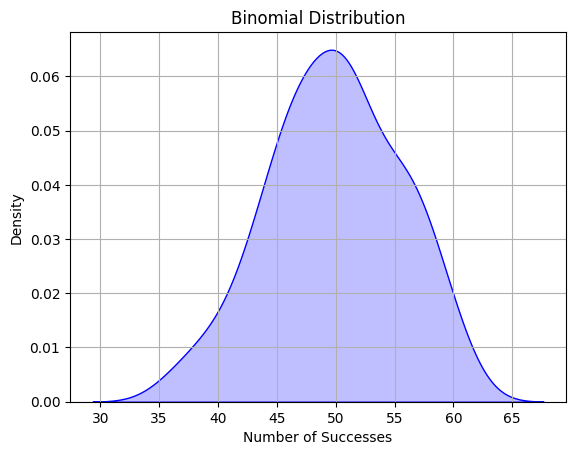

In [8]:
sns.kdeplot(np.random.binomial(n=100, p=0.5, size=100), fill=True, color='blue')

plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# `Poisson Distribution`

The **Poisson Distribution** is a discrete probability distribution used to model the number of events occurring in a fixed interval of **time** or **space**, given that these events happen with a **constant mean rate** and **independently** of the time since the last event. 

In simple terms, the Poisson distribution tells us the probability of a number of events happening in a fixed period when we know how often the event typically occurs.

#### Properties of the Poisson Distribution

- 1. Events occur independently.
- 2. The average rate (events per interval) is constant.
- 3. Two events cannot occur at the exact same instant.
- 4. Events are rare compared to the possible number of opportunities.

### Mathematical Representation

The **probability mass function (PMF)** of a Poisson distribution is given by the formula:

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

Where:
- \( k \) = **Number of occurrences**
- \( λ \) = **Average rate of occurrence (mean number of events per interval)**
- \( e \) = **Euler's number** (approximately 2.71828)

### Mean and Variance

For a Poisson distribution:
- The **mean (μ)** is given by 
$$
μ = \lambda
$$
- The **variance (σ²)** is given by 
$$
σ^2 = \lambda
$$



Calculated Poisson Lambda (Mean of 'campaign'): 2.76


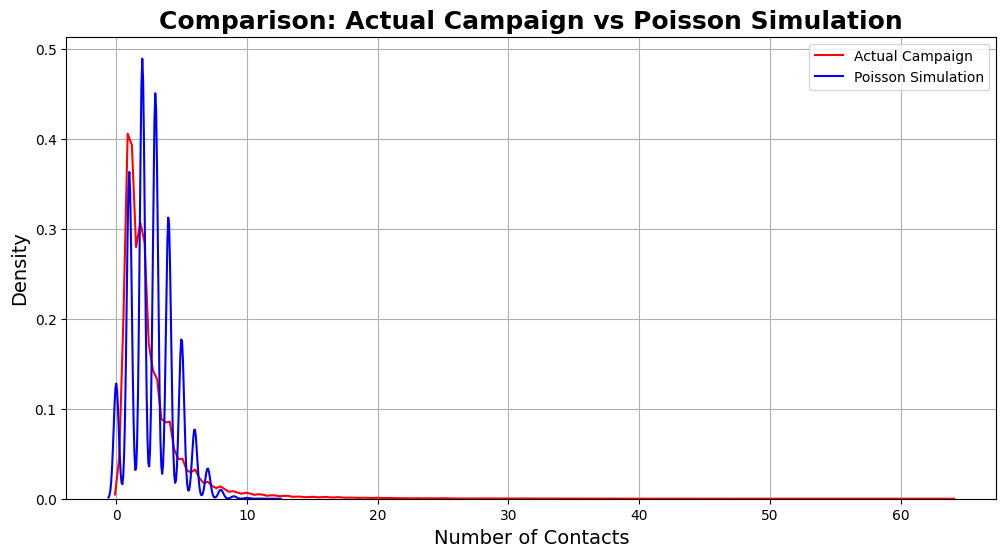

In [25]:
#  Poisson Distribution
# Step 1: Calculate mean (lambda) for Poisson
lambda_val = df['campaign'].mean()
print(f"Calculated Poisson Lambda (Mean of 'campaign'): {lambda_val:.2f}")

# Step 2: Generate Poisson distributed data
poisson_data = np.random.poisson(lam=lambda_val, size=len(df))

# Step 3: Plotting
plt.figure(figsize=(12, 6))

# Plot actual 'campaign' data
sns.kdeplot(df['campaign'], color='red', label='Actual Campaign')

# Plot Poisson simulated data
sns.kdeplot(poisson_data, color='blue', label='Poisson Simulation')

# Title and labels
plt.title('Comparison: Actual Campaign vs Poisson Simulation', fontsize=18, fontweight='bold')
plt.xlabel('Number of Contacts', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
